<a href="https://colab.research.google.com/github/nxxk23/PROJECT/blob/main/FileLab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
hemo = pd.read_csv('/content/drive/MyDrive/Thesis Project Kidney/Hemodialysis.csv', encoding='latin1')

In [3]:
lab = pd.read_csv('/content/drive/MyDrive/Thesis Project Kidney/Lab.csv')

In [4]:
import pandas as pd
slope = pd.read_excel('/content/drive/MyDrive/Thesis Project Kidney/Assign/SummaryFile/LabSlope.xlsx')

In [5]:
# Create a list from hemo['PatientUID']
patient_uid_list = hemo['PatientUID'].unique().tolist()
# Remove patient UIDs from lab['PatientUID'] that are not in the list
lab = lab[~lab['PatientUID'].isin(patient_uid_list)]
lab.shape

(17728574, 11)

In [6]:
lab0 = pd.DataFrame(lab) #1522

In [7]:
lab_location = lab['Location'].value_counts().reset_index()
lab_location.columns = ['Location', 'Location_Count']

lab_result = lab['ResultItemName'].value_counts().reset_index()
lab_result.columns = ['ResultItemName', 'ResultItemName_Count']

lab_request = lab['RequestItemName'].value_counts().reset_index()
lab_request.columns = ['RequestItemName', 'RequestItemName_Count']

columns_to_count = ['Location', 'ResultItemName', 'RequestItemName']

# Count unique values in the specified columns
lab_count = lab[columns_to_count].value_counts().reset_index()
lab_count.columns = ['Location', 'ResultItemName', 'RequestItemName', 'Count']

lab_df = pd.DataFrame(lab_count)

In [8]:
LabSummaryDF = pd.DataFrame(lab_df)

# **Slope**


> **ค่า x = ค่าจากวิสิท t ที่มาก่อน**




In [9]:
data = pd.DataFrame(slope)
data = data[['PatientUID','PatientVisitUID','Slopes']]
data = data.dropna()

In [10]:
df = pd.DataFrame(data)

# Sort the DataFrame by PatientUID and PatientVisitUID
df = df.sort_values(by=['PatientUID', 'PatientVisitUID'])

# Create a new column to store the previous slope value
df['PreviousSlope'] = df['Slopes'].shift(1)

# Update the Slopes column with the PreviousSlope values
df['Slopes'] = df['PreviousSlope']

# Drop the PreviousSlope column
df = df.drop(columns=['PreviousSlope'])
data = df.dropna()

# **Generate Date**


```
We want Only Date not time
```



In [11]:
df = pd.DataFrame(lab)

In [12]:
df['CWhen'] = df['CWhen'].astype(str)

In [13]:
df[['date', 'time']] = df['CWhen'].str.split(' ', 1, expand=True)

<ipython-input-13-e6685312b462>:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['date', 'time']] = df['CWhen'].str.split(' ', 1, expand=True)


In [14]:
df.drop(['CWhen','time'], axis=1, inplace=True)

In [15]:
lab = pd.DataFrame(df)

# **LabList**


> **Replace Item with List then create new table to store the value**




In [16]:
# Define the mapping of LabSummaryDF indices to lab result DataFrames
lab_mapping = {
    'lab1': [1, 1587],
    'lab2': [3, 129, 185, 312],
    'lab3': [0, 103],
    'lab4': [5, 115],
    'lab5': [2, 112],
    'lab6': [6, 118],
    'lab7': [4, 117],
    'lab8': [63, 194],
    'lab9': [31, 172],
    'lab10': [33, 175],
    'lab11': [21, 137],
    'lab12': [22, 3001],
    'lab13': [8, 100, 1736, 2577, 2856, 2980],
    'lab14': [13],
    'lab15': [15],
    'lab16': [159],
    'lab17': [198, 238, 584],
    'lab18': [154],
    'lab19': [30, 156, 177, 223, 277, 561],
    'lab20': [49, 153],
    'lab21': [23, 114],
    'lab22': [50, 130],
    'lab23': [34, 126],
    'lab24': [51, 131],
    'lab25': [220, 304, 539, 2909],
    'lab26': [191, 253],
    'lab27': [163],
    'lab28': [108,397,73,305],
    'lab29': [176, 2796],
    'lab30': [218, 949],
    'lab31': [233, 1424],
    'lab32': [182, 473]
    # ... add more mappings as needed
}

In [17]:
# Create new columns for labels
lab['LabelResult'] = ""
lab['LabelRequest'] = ""

# Iterate through the prescription_mapping dictionary and update 'LabelResult' and 'LabelRequest' columns
for lab_name, indices in lab_mapping.items():
    result_item_names = LabSummaryDF[LabSummaryDF.index.isin(indices)]['ResultItemName'].tolist()
    request_item_names = LabSummaryDF[LabSummaryDF.index.isin(indices)]['RequestItemName'].tolist()
    lab.loc[lab['ResultItemName'].isin(result_item_names), 'LabelResult'] = lab_name
    lab.loc[lab['RequestItemName'].isin(request_item_names), 'LabelRequest'] = lab_name

## **Define**

กรณีคล้าย FileMedical

```
มันจะมี rows ที่ mapping value ไม่ตรงกัน เช่น
```
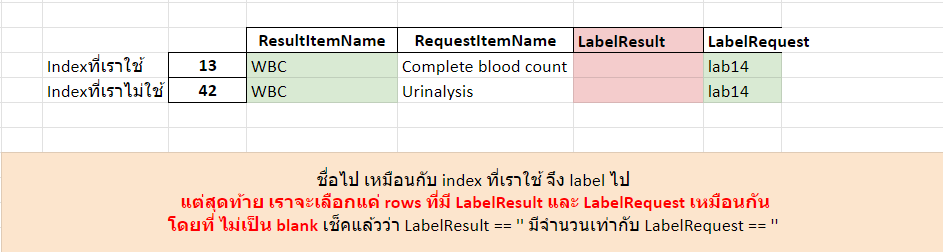


In [ ]:
lab = lab[(lab['LabelResult'] == lab['LabelRequest']) & (lab['LabelResult'] != '')] #4870142
#lab[(lab['LabelResult'] == lab['LabelRequest']) & (lab['LabelRequest'] != '')].shape #4870142 So เลือกอันไหนก็มีค่าเท่ากัน

In [18]:
lab #4870142

,LabNo,PatientUID,PatientVisitUID,Location,RequestItemName,ResultItemName,ResultDttm,ResultValue,Unit,ReferenceRange,date,LabelResult,LabelRequest
0,1,2299,2024049,เวชศาสตร์นิวเคลียร์ (OPD)-D15,BMD LUMBAR,Formatted Result,NaN,FT,NaN,NaN,2558-02-19,,
1,1,2299,2024049,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,"ALBUMIN, 32403","ALBUMIN, 32403",NaN,4.1,NaN,3.8 - 5.4,2558-02-19,lab11,lab11
2,1,2299,2024049,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,Alkaline Phos,"ALP, 32309",NaN,44,NaN,42 - 121,2558-02-19,,
3,1,2299,2024049,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,"ALT, 32311","ALT, 32311",NaN,17,NaN,4 - 36,2558-02-19,,
4,1,2299,2024049,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,"AST, 32310","AST, 32310",NaN,23,NaN,12 - 32,2558-02-19,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21641153,601,822860,5140446,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,Dextrostix(POCT),DTX(POCT),NaN,228,mg/dL,-,2561-10-19,,
21641156,602,822860,5140446,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,Dextrostix(POCT),DTX(POCT),NaN,240,mg/dL,-,2561-10-19,,
21641159,603,822860,5140446,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,Dextrostix(POCT),DTX(POCT),NaN,171,mg/dL,-,2561-10-19,,
21641162,604,822860,5140446,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,Dextrostix(POCT),DTX(POCT),NaN,191,mg/dL,-,2561-10-20,,


# **WideTableLab**


In [ ]:
# Initialize a dictionary to store the vital values
lab_dict = {}

# Iterate through unique ResultItemName values
for result_item in lab['LabelResult'].unique():
    # Filter vital DataFrame for the current result_item
    subset_lab = lab[lab['LabelResult'] == result_item]

    # Merge the subset_lab with data on PatientUID and PatientVisitUID
    merged_data = pd.merge(data, subset_lab[['PatientUID', 'PatientVisitUID', 'ResultValue', 'CWhen']], on=['PatientUID', 'PatientVisitUID'], how='left')

    # Rename the ResultValue column to match the result_item
    merged_data.rename(columns={'ResultValue': result_item}, inplace=True)

    # Update the lab_dict with the result_item as the key and merged_data as the value
    lab_dict[result_item] = merged_data

# Concatenate the dictionary values to get the final result
final_result = pd.concat(lab_dict.values(), axis=1)

# Drop duplicate columns (except for 'PatientUID', 'PatientVisitUID', and 'Slopes')
final_result = final_result.loc[:, ~final_result.columns.duplicated()]

# Filter rows that have values in ['PatientUID', 'PatientVisitUID', and 'Slopes']
final_result = final_result.dropna(subset=['PatientUID', 'PatientVisitUID', 'Slopes'])

# Reset index of the DataFrame if needed
#final_result.reset_index(drop=True, inplace=True)


In [ ]:
lab.isnull().any()

LabNo              False
PatientUID         False
PatientVisitUID    False
Location           False
RequestItemName    False
ResultItemName     False
CWhen              False
ResultDttm          True
ResultValue         True
Unit                True
ReferenceRange      True
LabelResult        False
LabelRequest       False
dtype: bool

In [ ]:
lab[lab['PatientVisitUID']==4286612.0]

,LabNo,PatientUID,PatientVisitUID,Location,RequestItemName,ResultItemName,CWhen,ResultDttm,ResultValue,Unit,ReferenceRange,LabelResult,LabelRequest
283,1,2299,4286612,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,BUN,"BUN, 32201",2560-07-05 10:40:40.940,NaN,19.0,mg/dL,5.8 - 19.1,lab2,lab2
284,1,2299,4286612,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,CHOLESTEROL,"CHOLESTEROL, 32501",2560-07-05 09:50:36.707,NaN,217,mg/dL,127 - 262,lab21,lab21
285,1,2299,4286612,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,CREATININE,"CREATININE, 32202",2560-07-05 10:40:40.763,NaN,0.84,mg/dL,0.50 - 1.50,lab3,lab3
287,1,2299,4286612,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,HB A1C,"HB A1C, 32401",2560-07-05 09:50:37.027,NaN,5.2,%,4.6 - 7.0,lab20,lab20
288,1,2299,4286612,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,HDL-C,"HDL-C, 32503",2560-07-05 09:50:36.857,NaN,75,mg/dL,> 35,lab24,lab24
289,1,2299,4286612,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,LDL-CHOL (DIRECT),"LDL-CHOL (DIRECT), 32504",2560-07-05 09:50:36.947,NaN,144,mg/dL,10 - 150,lab23,lab23
290,1,2299,4286612,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,SUGAR IN NAF-PLASMA,"SUGAR IN NAF-PLASMA, 32203",2560-07-05 09:50:36.607,NaN,83,mg/dL,70 - 110,lab19,lab19
291,1,2299,4286612,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,TRIGLYCERIDE,"TRIGLYCERIDE, 32502",2560-07-05 09:50:36.783,NaN,57,mg/dL,10 - 200,lab22,lab22
292,1,2299,4286612,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,URIC ACID,"URIC ACID, 32205",2560-07-05 10:40:40.997,NaN,4.0,mg/dL,2.7 - 7.0,lab8,lab8
306,1,2299,4286612,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,Complete blood count,PLT,2560-07-05 10:53:36.177,NaN,211,10^3/uL,173 - 383,lab15,lab15


In [ ]:
final_result[final_result['CWhen'].isnull()]

,PatientUID,PatientVisitUID,Slopes,lab11,CWhen,lab2,lab9,lab21,lab3,lab19,...,lab6,lab4,lab28,lab27,lab32,lab29,lab30,lab13,lab31,lab12
0,2299.0,4286612.0,0.002857,NaN,NaN,19.0,NaN,217,0.84,83,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2299.0,4546471.0,0.020833,NaN,NaN,13.0,NaN,211,0.90,86,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2299.0,4801938.0,-0.062921,NaN,NaN,16.1,NaN,219,0.96,86,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2299.0,5051781.0,-0.056522,NaN,NaN,NaN,NaN,206,0.91,95,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2299.0,5296557.0,0.047619,NaN,NaN,14.1,NaN,NaN,1.01,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329820,3404606.0,9999120.0,5.507000,NaN,NaN,NaN,NaN,NaN,1.52,NaN,...,101,137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
329822,3404606.0,10407907.0,0.093077,NaN,NaN,NaN,NaN,NaN,1.93,NaN,...,101,140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
329828,3405518.0,10452400.0,0.126867,NaN,NaN,NaN,NaN,NaN,1.31,NaN,...,101,138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
329840,3409733.0,10435209.0,-0.655833,NaN,NaN,23.4,NaN,NaN,1.52,NaN,...,NaN,143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## **Duplicate Rows**

In [ ]:
import pandas as pd

# Assuming your DataFrame is named 'final_result'
sorted_result = final_result.groupby(['PatientUID', 'PatientVisitUID', 'Slopes']).apply(
    lambda group: group.sort_values(by='CWhen')
)

sorted_result.reset_index(drop=True, inplace=True)  # Reset index after sorting

<ipython-input-45-9f501576adad>:4: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  sorted_result = final_result.groupby(['PatientUID', 'PatientVisitUID', 'Slopes']).apply(


In [ ]:
sorted_result

,PatientUID,PatientVisitUID,Slopes,lab11,CWhen,lab2,lab9,lab21,lab3,lab19,...,lab6,lab4,lab28,lab27,lab32,lab29,lab30,lab13,lab31,lab12
0,2299.0,4286612.0,0.002857,NaN,NaN,19.0,NaN,217,0.84,83,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2299.0,4546471.0,0.020833,NaN,NaN,13.0,NaN,211,0.90,86,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2299.0,4801938.0,-0.062921,NaN,NaN,16.1,NaN,219,0.96,86,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2299.0,5051781.0,-0.056522,NaN,NaN,NaN,NaN,206,0.91,95,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2299.0,5296557.0,0.047619,NaN,NaN,14.1,NaN,NaN,1.01,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329843,3432056.0,10408954.0,1.129412,3.8,2566-02-24 21:05:12.877,25.6,NaN,NaN,2.61,NaN,...,NaN,143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
329844,3432056.0,10408954.0,1.129412,3.8,2566-02-25 06:42:01.043,22.0,NaN,NaN,3.04,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
329845,3432056.0,10408954.0,1.129412,3.6,2566-02-25 14:49:56.763,13.8,NaN,NaN,3.16,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
329846,3432056.0,10408954.0,1.129412,3.9,2566-02-26 07:25:17.043,11.5,NaN,NaN,3.55,NaN,...,NaN,139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
sorted_result[sorted_result.duplicated(subset=['PatientVisitUID'], keep=False)]

,PatientUID,PatientVisitUID,Slopes,lab11,CWhen,lab2,lab9,lab21,lab3,lab19,...,lab6,lab4,lab28,lab27,lab32,lab29,lab30,lab13,lab31,lab12
85,2362.0,9114111.0,-0.010000,4.4,2565-01-24 19:43:20.690,30.9,9.3,147,1.99,110,...,103,139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,2362.0,9114111.0,-0.010000,4.8,2565-01-25 06:55:29.883,29.3,NaN,128,1.92,NaN,...,98,135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
206,3200.0,9197008.0,0.007619,3.5,2565-02-20 21:54:58.907,11.2,8.3,NaN,0.86,NaN,...,98,138,43.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
207,3200.0,9197008.0,0.007619,3.4,2565-02-21 07:26:20.290,10.2,8.4,128,0.84,78,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208,3200.0,9197008.0,0.007619,2.9,2565-03-05 07:56:20.147,NaN,NaN,96,0.83,80,...,NaN,NaN,NaN,NaN,311,256,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329834,3406952.0,10216464.0,0.179859,3.6,2566-02-06 07:45:05.790,27.6,NaN,NaN,1.62,NaN,...,102,134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
329843,3432056.0,10408954.0,1.129412,3.8,2566-02-24 21:05:12.877,25.6,NaN,NaN,2.61,NaN,...,NaN,143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
329844,3432056.0,10408954.0,1.129412,3.8,2566-02-25 06:42:01.043,22.0,NaN,NaN,3.04,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
329845,3432056.0,10408954.0,1.129412,3.6,2566-02-25 14:49:56.763,13.8,NaN,NaN,3.16,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#final_result = sorted_result.copy()

In [ ]:
#final_result

In [ ]:
final_result[final_result.duplicated(subset=['PatientVisitUID'], keep=False)]

,PatientUID,PatientVisitUID,Slopes,lab11,CWhen,lab2,lab9,lab21,lab3,lab19,...,lab6,lab4,lab28,lab27,lab32,lab29,lab30,lab13,lab31,lab12
86,2362.0,9114111.0,-0.010000,4.8,2565-01-25 06:55:29.883,29.3,NaN,128,1.92,NaN,...,98,135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,2362.0,9114111.0,-0.010000,4.4,2565-01-24 19:43:20.690,30.9,9.3,147,1.99,110,...,103,139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208,3200.0,9197008.0,0.007619,2.9,2565-03-05 07:56:20.147,NaN,NaN,96,0.83,80,...,NaN,NaN,NaN,NaN,311,256,NaN,NaN,NaN,NaN
207,3200.0,9197008.0,0.007619,3.4,2565-02-21 07:26:20.290,10.2,8.4,128,0.84,78,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
206,3200.0,9197008.0,0.007619,3.5,2565-02-20 21:54:58.907,11.2,8.3,NaN,0.86,NaN,...,98,138,43.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329830,3406952.0,10216464.0,0.179859,3.7,2566-01-09 07:58:15.463,NaN,NaN,NaN,2.55,NaN,...,97,137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
329846,3432056.0,10408954.0,1.129412,3.9,2566-02-26 07:25:17.043,11.5,NaN,NaN,3.55,NaN,...,NaN,139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
329845,3432056.0,10408954.0,1.129412,3.6,2566-02-25 14:49:56.763,13.8,NaN,NaN,3.16,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
329844,3432056.0,10408954.0,1.129412,3.8,2566-02-25 06:42:01.043,22.0,NaN,NaN,3.04,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
lab[lab['PatientVisitUID']==9114111.0]

,LabNo,PatientUID,PatientVisitUID,Location,RequestItemName,ResultItemName,CWhen,ResultDttm,ResultValue,Unit,ReferenceRange,LabelResult,LabelRequest
3029,1,2362,9114111,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,ALBUMIN,"ALBUMIN, 32403",2565-01-24 19:43:20.690,NaN,4.4,g/dL,3.5-5.2,lab11,lab11
3033,1,2362,9114111,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,BICARBONATE,"BICARBONATE, 32105",2565-01-24 19:43:22.170,NaN,25.1,mEq/L,23-30,lab7,lab7
3034,1,2362,9114111,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,BUN,"BUN, 32201",2565-01-24 22:23:16.193,NaN,30.9,mg/dL,6-20,lab2,lab2
3035,1,2362,9114111,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,CALCIUM,"CALCIUM, 32106",2565-01-25 06:55:30.563,NaN,9.3,mg/dL,8.8-10.2,lab9,lab9
3036,1,2362,9114111,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,CHLORIDE,"CHLORIDE, 32104",2565-01-24 19:43:21.977,NaN,103,mEq/L,98-106,lab6,lab6
3037,1,2362,9114111,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,CHOLESTEROL,"CHOLESTEROL, 32501",2565-01-24 19:43:20.470,NaN,128,mg/dL,0-200,lab21,lab21
3039,1,2362,9114111,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,CREATININE,"CREATININE, 32202",2565-01-24 19:43:20.347,NaN,1.99,mg/dL,0.67-1.17,lab3,lab3
3043,1,2362,9114111,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,Ferritin,Ferritin,2565-01-25 07:17:12.257,NaN,226,ng/ml,20-235,lab18,lab18
3046,1,2362,9114111,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,PHOSPHORUS,"PHOSPHORUS, 32109",2565-01-25 06:55:30.973,NaN,4.4,mg/dL,2.7-4.5,lab10,lab10
3047,1,2362,9114111,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,POTASSIUM,"POTASSIUM, 32103",2565-01-24 19:43:21.810,NaN,4.6,mEq/L,3.5-5,lab5,lab5


In [ ]:
# aftersort data by "CWhen" we will keep the latest visit row
final_result.drop_duplicates(subset=['PatientUID', 'PatientVisitUID'], keep='first', inplace=True)

In [ ]:
final_result

,PatientUID,PatientVisitUID,Slopes,lab11,CWhen,lab2,lab9,lab21,lab3,lab19,...,lab20,lab7,lab6,lab4,lab28,lab27,lab32,lab29,lab30,lab31
0,2299.0,4286612.0,0.002857,NaN,NaN,19.0,NaN,217,0.84,83,...,5.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2299.0,4546471.0,0.020833,NaN,NaN,13.0,NaN,211,0.90,86,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2299.0,4801938.0,-0.062921,NaN,NaN,16.1,NaN,219,0.96,86,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2299.0,5051781.0,-0.056522,NaN,NaN,NaN,NaN,206,0.91,95,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2299.0,5296557.0,0.047619,NaN,NaN,14.1,NaN,NaN,1.01,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329841,3432056.0,10235244.0,-0.208313,4.4,2566-01-09 12:30:08.737,36.4,NaN,NaN,2.00,NaN,...,NaN,26.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
329842,3432056.0,10306813.0,0.168400,NaN,NaN,40.2,NaN,NaN,2.49,NaN,...,NaN,27.2,NaN,141,NaN,NaN,NaN,NaN,NaN,NaN
329846,3432056.0,10408954.0,1.129412,3.9,2566-02-26 07:25:17.043,11.5,NaN,NaN,3.55,NaN,...,NaN,32.7,NaN,139,NaN,NaN,NaN,NaN,NaN,NaN
329847,3432056.0,10573233.0,0.035000,4.1,2566-04-10 09:51:31.020,14.3,NaN,NaN,3.49,NaN,...,NaN,27.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
labDF = final_result[['PatientUID','PatientVisitUID','Slopes','lab1','lab2', 'lab3',
                      'lab4', 'lab5', 'lab6', 'lab7', 'lab8', 'lab9', 'lab10', 'lab11',
                      'lab12', 'lab13', 'lab14', 'lab15', 'lab16', 'lab17', 'lab18',
                      'lab19', 'lab20', 'lab21', 'lab22', 'lab23', 'lab24', 'lab25', 'lab26',
                      'lab27', 'lab28', 'lab29', 'lab30', 'lab31', 'lab32']]
# Drop rows with missing values in 'PatientUID', 'PatientVisitUID', and 'Slopes'
labDF = labDF.dropna(subset=['PatientUID', 'PatientVisitUID', 'Slopes'])

In [ ]:
labDF

,PatientUID,PatientVisitUID,Slopes,lab1,lab2,lab3,lab4,lab5,lab6,lab7,...,lab23,lab24,lab25,lab26,lab27,lab28,lab29,lab30,lab31,lab32
0,2299.0,4286612.0,0.002857,69.20,19.0,0.84,NaN,NaN,NaN,NaN,...,144,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2299.0,4546471.0,0.020833,63.60,13.0,0.90,NaN,NaN,NaN,NaN,...,143,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2299.0,4801938.0,-0.062921,58.40,16.1,0.96,NaN,NaN,NaN,NaN,...,146,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2299.0,5051781.0,-0.056522,62.40,NaN,0.91,NaN,NaN,NaN,NaN,...,133,86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2299.0,5296557.0,0.047619,55.00,14.1,1.01,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329840,3409733.0,10435209.0,-0.655833,14.20,23.4,1.52,143,4.9,NaN,24.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
329841,3432056.0,10235244.0,-0.208313,15.80,36.4,2.00,NaN,4.9,NaN,26.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
329842,3432056.0,10306813.0,0.168400,19.80,40.2,2.49,141,4.9,NaN,27.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
329846,3432056.0,10408954.0,1.129412,59.90,11.5,3.55,139,4.7,NaN,32.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## **Rename Columns**

In [ ]:
# Create a dictionary for renaming columns
column_rename_dict = {
    'lab1': 'eGFR',
    'lab2': 'BUN',
    'lab3': 'Creatinine',
    'lab4': 'Sodium',
    'lab5': 'Potassium',
    'lab6': 'Chloride',
    'lab7': 'Bicarbonate',
    'lab8': 'Uric',
    'lab9': 'Calcium',
    'lab10': 'Phosphorus',
    'lab11': 'Albumin',
    'lab12': 'Hemoglobin',
    'lab13': 'Hematocrit',
    'lab14': 'WBC',
    'lab15': 'Platelet',
    'lab16': 'TIBC',
    'lab17': 'Tranferin SAT',
    'lab18': 'Ferritin',
    'lab19': 'Blood sugar',
    'lab20': 'HbA1c',
    'lab21': 'Cholesterol',
    'lab22': 'Triglyceride',
    'lab23': 'LDL Cholesterol',
    'lab24': 'HDL Cholesterol',
    'lab25': 'Parathyroid hormone',
    'lab26': 'Vitamin D',
    'lab27': 'UrineAlbumin/Cr ratio',
    'lab28': 'UrineProtein/Cr ratio',
    'lab29': 'UrineVolume (24hrs)',
    'lab30': 'UrineUrea (24hrs)',
    'lab31': 'UrineSodium (24hrs)',
    'lab32': 'UrineProtein (24hrs)'
}
# Use the rename method to rename the columns
labDF.rename(columns=column_rename_dict, inplace=True)
labDF

,PatientUID,PatientVisitUID,Slopes,eGFR,BUN,Creatinine,Sodium,Potassium,Chloride,Bicarbonate,...,LDL Cholesterol,HDL Cholesterol,Parathyroid hormone,Vitamin D,UrineAlbumin/Cr ratio,UrineProtein/Cr ratio,UrineVolume (24hrs),UrineUrea (24hrs),UrineSodium (24hrs),UrineProtein (24hrs)
0,2299.0,4286612.0,0.002857,69.20,19.0,0.84,NaN,NaN,NaN,NaN,...,144,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2299.0,4546471.0,0.020833,63.60,13.0,0.90,NaN,NaN,NaN,NaN,...,143,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2299.0,4801938.0,-0.062921,58.40,16.1,0.96,NaN,NaN,NaN,NaN,...,146,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2299.0,5051781.0,-0.056522,62.40,NaN,0.91,NaN,NaN,NaN,NaN,...,133,86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2299.0,5296557.0,0.047619,55.00,14.1,1.01,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329840,3409733.0,10435209.0,-0.655833,14.20,23.4,1.52,143,4.9,NaN,24.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
329841,3432056.0,10235244.0,-0.208313,15.80,36.4,2.00,NaN,4.9,NaN,26.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
329842,3432056.0,10306813.0,0.168400,19.80,40.2,2.49,141,4.9,NaN,27.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
329846,3432056.0,10408954.0,1.129412,59.90,11.5,3.55,139,4.7,NaN,32.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


> **Check dup**

In [ ]:
# Check for duplicate rows in data
duplicates_data = data[data.duplicated(['PatientUID', 'PatientVisitUID'], keep=False)]

# Check for duplicate rows in vitalDF
duplicates_vitalDF = labDF[labDF.duplicated(['PatientUID', 'PatientVisitUID', 'Slopes'], keep=False)]


In [ ]:
duplicates_vitalDF

,PatientUID,PatientVisitUID,Slopes,eGFR,BUN,Creatinine,Sodium,Potassium,Chloride,Bicarbonate,...,LDL Cholesterol,HDL Cholesterol,Parathyroid hormone,Vitamin D,UrineAlbumin/Cr ratio,UrineProtein/Cr ratio,UrineVolume (24hrs),UrineUrea (24hrs),UrineSodium (24hrs),UrineProtein (24hrs)


In [ ]:
lab0[lab0['PatientVisitUID']==4286612.0]

,LabNo,PatientUID,PatientVisitUID,Location,RequestItemName,ResultItemName,CWhen,ResultDttm,ResultValue,Unit,ReferenceRange
279,1,2299,4286612,ห้อง Xray ชั้น 1-D1403,CHEST Checkup,Formatted Result,2560-07-05 10:43:06.683,NaN,FT,NaN,NaN
280,1,2299,4286612,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,Alkaline Phos,"ALP, 32309",2560-07-05 10:40:41.573,NaN,45,U/L,42 - 121
281,1,2299,4286612,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,ALT,"ALT, 32311",2560-07-05 10:40:41.403,NaN,20,U/L,4 - 36
282,1,2299,4286612,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,AST,"AST, 32310",2560-07-05 10:40:41.490,NaN,23,U/L,12 - 32
283,1,2299,4286612,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,lab2,lab2,2560-07-05 10:40:40.940,NaN,19.0,mg/dL,5.8 - 19.1
284,1,2299,4286612,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,lab21,lab21,2560-07-05 09:50:36.707,NaN,217,mg/dL,127 - 262
285,1,2299,4286612,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,lab1,lab3,2560-07-05 10:40:40.763,NaN,0.84,mg/dL,0.50 - 1.50
286,1,2299,4286612,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,lab1,lab1,2560-07-05 10:40:40.763,NaN,69.20,ml/min/1.73m2,-
287,1,2299,4286612,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,lab20,lab20,2560-07-05 09:50:37.027,NaN,5.2,%,4.6 - 7.0
288,1,2299,4286612,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,lab24,lab24,2560-07-05 09:50:36.857,NaN,75,mg/dL,> 35


In [ ]:
labDF

,PatientUID,PatientVisitUID,Slopes,eGFR,BUN,Creatinine,Sodium,Potassium,Chloride,Bicarbonate,...,LDL Cholesterol,HDL Cholesterol,Parathyroid hormone,Vitamin D,UrineAlbumin/Cr ratio,UrineProtein/Cr ratio,UrineVolume (24hrs),UrineUrea (24hrs),UrineSodium (24hrs),UrineProtein (24hrs)
0,2299.0,4286612.0,0.002857,69.20,19.0,0.84,NaN,NaN,NaN,NaN,...,144,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2299.0,4546471.0,0.020833,63.60,13.0,0.90,NaN,NaN,NaN,NaN,...,143,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2299.0,4801938.0,-0.062921,58.40,16.1,0.96,NaN,NaN,NaN,NaN,...,146,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2299.0,5051781.0,-0.056522,62.40,NaN,0.91,NaN,NaN,NaN,NaN,...,133,86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2299.0,5296557.0,0.047619,55.00,14.1,1.01,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329840,3409733.0,10435209.0,-0.655833,14.20,23.4,1.52,143,4.9,NaN,24.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
329841,3432056.0,10235244.0,-0.208313,15.80,36.4,2.00,NaN,4.9,NaN,26.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
329842,3432056.0,10306813.0,0.168400,19.80,40.2,2.49,141,4.9,NaN,27.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
329846,3432056.0,10408954.0,1.129412,59.90,11.5,3.55,139,4.7,NaN,32.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
labDF.to_excel('labDF.xlsx')